In [4]:
import pandas as pd

data = pd.read_excel("solardataset.xlsx")
print(data.head())


        Date  Temp (Â°C)  Cloud (%)  Wind (m/s)    kWh
0 2025-05-01        32.5         73         2.2  16.84
1 2025-05-02        30.6         65         2.3  17.87
2 2025-05-03        32.9         52         1.6  19.25
3 2025-05-04        35.6         23         2.5  21.83
4 2025-05-05        30.3          8         2.3  23.52


In [5]:
data.columns = ['Date', 'Temp', 'Cloud', 'Wind', 'kWh']

In [6]:
print(data.isnull().sum())


Date     0
Temp     0
Cloud    0
Wind     0
kWh      0
dtype: int64


In [7]:
data = data.dropna()  # or fill with mean if minor


In [8]:
data['Date'] = pd.to_datetime(data['Date'])


In [9]:
print(data.columns)
print(data.head())


Index(['Date', 'Temp', 'Cloud', 'Wind', 'kWh'], dtype='object')
        Date  Temp  Cloud  Wind    kWh
0 2025-05-01  32.5     73   2.2  16.84
1 2025-05-02  30.6     65   2.3  17.87
2 2025-05-03  32.9     52   1.6  19.25
3 2025-05-04  35.6     23   2.5  21.83
4 2025-05-05  30.3      8   2.3  23.52


In [10]:
print(data['Date'].head())


0   2025-05-01
1   2025-05-02
2   2025-05-03
3   2025-05-04
4   2025-05-05
Name: Date, dtype: datetime64[ns]


In [11]:
data['Date'] = pd.to_datetime(data['Date'])


In [12]:
data['Month'] = data['Date'].dt.month
data['DayOfYear'] = data['Date'].dt.dayofyear


In [13]:
print(data[['Date','Month','DayOfYear']].head())


        Date  Month  DayOfYear
0 2025-05-01      5        121
1 2025-05-02      5        122
2 2025-05-03      5        123
3 2025-05-04      5        124
4 2025-05-05      5        125


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = data[['Temp', 'Cloud', 'Wind', 'Month', 'DayOfYear']]
X_scaled = scaler.fit_transform(X)


In [15]:
print(data['Date'].head())
print(data.columns)


0   2025-05-01
1   2025-05-02
2   2025-05-03
3   2025-05-04
4   2025-05-05
Name: Date, dtype: datetime64[ns]
Index(['Date', 'Temp', 'Cloud', 'Wind', 'kWh', 'Month', 'DayOfYear'], dtype='object')


In [16]:
print(data.head())


        Date  Temp  Cloud  Wind    kWh  Month  DayOfYear
0 2025-05-01  32.5     73   2.2  16.84      5        121
1 2025-05-02  30.6     65   2.3  17.87      5        122
2 2025-05-03  32.9     52   1.6  19.25      5        123
3 2025-05-04  35.6     23   2.5  21.83      5        124
4 2025-05-05  30.3      8   2.3  23.52      5        125


In [17]:
data


,Date,Temp,Cloud,Wind,kWh,Month,DayOfYear
0,2025-05-01,32.5,73,2.2,16.84,5,121
1,2025-05-02,30.6,65,2.3,17.87,5,122
2,2025-05-03,32.9,52,1.6,19.25,5,123
3,2025-05-04,35.6,23,2.5,21.83,5,124
4,2025-05-05,30.3,8,2.3,23.52,5,125
...,...,...,...,...,...,...,...
179,2025-10-27,39.2,79,0.5,16.12,10,300
180,2025-10-28,31.9,52,1.6,18.60,10,301
181,2025-10-29,29.8,79,2.2,13.68,10,302
182,2025-10-30,32.2,28,2.5,21.35,10,303


In [18]:
data.head()


,Date,Temp,Cloud,Wind,kWh,Month,DayOfYear
0,2025-05-01,32.5,73,2.2,16.84,5,121
1,2025-05-02,30.6,65,2.3,17.87,5,122
2,2025-05-03,32.9,52,1.6,19.25,5,123
3,2025-05-04,35.6,23,2.5,21.83,5,124
4,2025-05-05,30.3,8,2.3,23.52,5,125


In [19]:
data.isnull().sum()


Date         0
Temp         0
Cloud        0
Wind         0
kWh          0
Month        0
DayOfYear    0
dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler

# Select features
X = data[['Temp', 'Cloud', 'Wind', 'Month', 'DayOfYear']]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
X_scaled = scaler.fit_transform(X)

# Optional: convert back to DataFrame for readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled.head())


       Temp     Cloud      Wind     Month  DayOfYear
0  0.554978  1.282247  0.273985 -1.462035  -1.722663
1 -0.118938  0.926859  0.438734 -1.462035  -1.703836
2  0.696855  0.349353 -0.714509 -1.462035  -1.685009
3  1.654525 -0.938931  0.768231 -1.462035  -1.666182
4 -0.225345 -1.605284  0.438734 -1.462035  -1.647355


In [21]:
from sklearn.model_selection import train_test_split

# Define target variable (the value we want to predict)
y = data['kWh']

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (147, 5)
Testing set size: (37, 5)


In [22]:
from sklearn.linear_model import LinearRegression

# Initialize model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print("✅ Model training completed successfully!")


✅ Model training completed successfully!


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict kWh for the test set
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Model Evaluation Results:
Mean Absolute Error (MAE): 0.49
Root Mean Squared Error (RMSE): 0.65
R² Score: 0.93


### ACCURACY RATE :93%

In [24]:
# Compare actual vs predicted values
predictions_df = pd.DataFrame({
    'Actual kWh': y_test.values,
    'Predicted kWh': y_pred
})

# Reset index for cleaner view
predictions_df = predictions_df.reset_index(drop=True)

print(predictions_df.head(10))


   Actual kWh  Predicted kWh
0       16.18      16.690571
1       20.61      20.337362
2       19.17      19.303328
3       17.07      17.602660
4       23.33      21.745770
5       20.71      20.165811
6       22.21      22.199368
7       21.02      22.080038
8       19.61      19.845877
9       21.62      22.113108


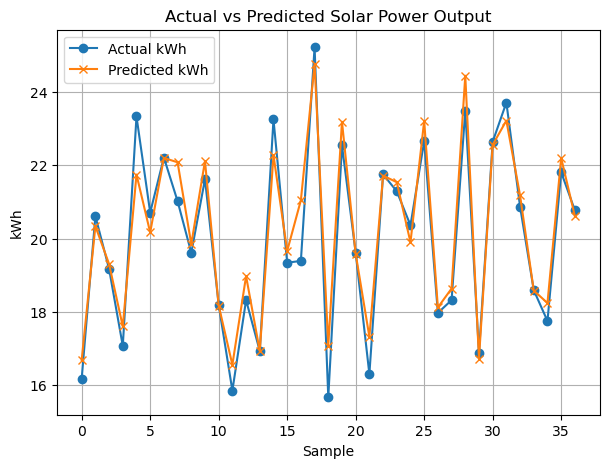

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(y_test.values, label='Actual kWh', marker='o')
plt.plot(y_pred, label='Predicted kWh', marker='x')
plt.title('Actual vs Predicted Solar Power Output')
plt.xlabel('Sample')
plt.ylabel('kWh')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
data.to_csv("solardataset_cleaned.csv", index=False)
